In [1]:
# TODO: fix linetypes in legend
library(ggplot2)
# for melt method
library(reshape2)

Warning message:
"package 'ggplot2' was built under R version 3.5.2"Warning message:
"package 'reshape2' was built under R version 3.5.2"

In [2]:
# read data from csv, skip first line containing comments
clData <- read.csv("./FluViewPhase2Data/52WeekNYFluData/WHO_NREVSS_Clinical_Labs.csv", skip=1)

# combine year and week and use them as xticks when plotting
xticks <- paste(as.character(clData$YEAR), as.character(clData$WEEK), sep="")



columns <- c("TOTAL.A", "TOTAL.B")

customLabels <- c("A", "B")


In [3]:
# get the data that we care and melt it
positiveData <- clData[, columns]
positiveData$category <- xticks
mPositiveData <- melt(positiveData, id.vars = "category")

In [4]:
new_df <- clData[, c("PERCENT.POSITIVE", "PERCENT.A", "PERCENT.B")]
new_df$category <- xticks
new_df$variable <- rep("null", nrow(new_df))

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


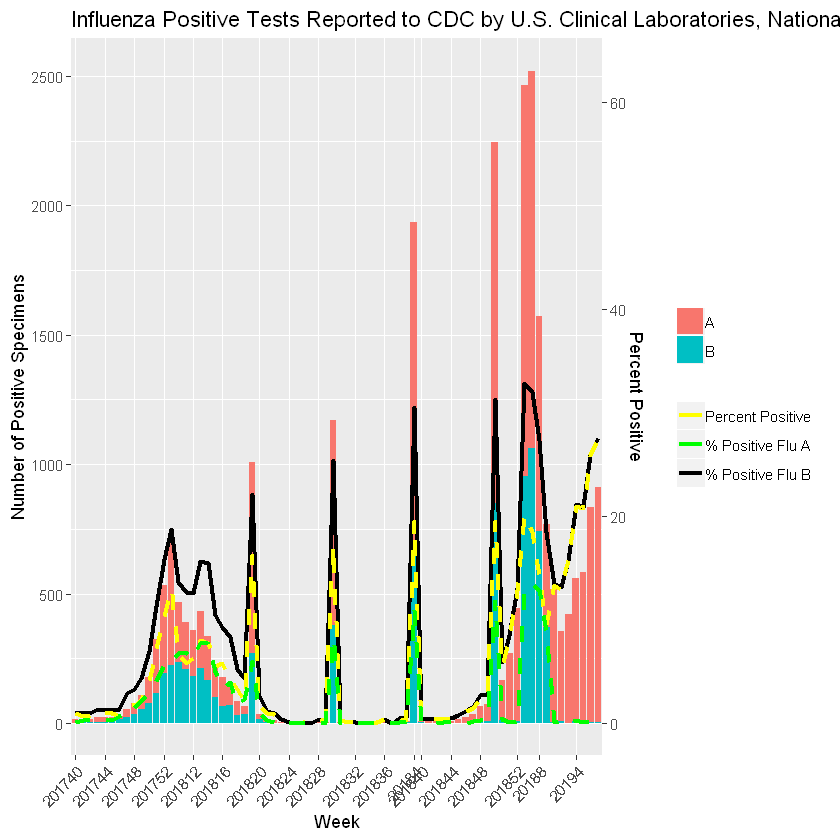

In [6]:
ggplot(
  data = mPositiveData,
  aes(
    category,
    value,
    fill = factor(variable, levels = columns, labels=customLabels)
  )) +
  geom_bar(stat = "identity") +
  ggtitle("Title") +
  ylim(0, 3000) +
  theme(legend.title=element_blank()) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  ggtitle("Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories, National Summary, 2018 - 2019 Season") +
  xlab("Week") +
  ylab("Number of Positive Specimens") +
  scale_y_continuous(sec.axis = sec_axis(~./40, name = "Percent Positive")) +
  geom_line(aes(y = PERCENT.POSITIVE*40, group=1, colour = "Percent Positive"), data=new_df, size=1.2) +
  geom_line(aes(y = PERCENT.A*40, group=1, colour = "% Positive Flu A"), data=new_df, linetype="dashed", size=1.2) +
  geom_line(aes(y = PERCENT.B*40, group=1, colour = "% Positive Flu B"), data=new_df, linetype="dashed", size=1.2) +
  scale_color_manual(values = c("yellow", "green", "black"), labels=c("Percent Positive", "% Positive Flu A", "% Positive Flu B")) +
  scale_linetype_manual(values = c(2, 2, 1)) +
  scale_x_discrete(breaks=mPositiveData$category[c(TRUE, FALSE, FALSE, FALSE)])